In [3]:
!pip install squarify

In [4]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# TREEMAP
import squarify  

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:purple" >2. Data</h1> 

In [5]:
raw9 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2009-2010")
raw10 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df1 = raw9.copy()
df2 = raw10.copy()

In [6]:
(df1.shape, df2.shape)

((525461, 8), (541910, 8))

In [7]:
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


<a id='missing'></a>
<h1 style="color:purple" >3. Missing Values</h1> 

In [8]:
print("2009-2010")
print("Missing Frequency: \n")
print(df1.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False))
print("")
print("2010-2011")
print("Missing Frequency: \n")
print(df2.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df2.isnull().sum() / df2.shape[0]).sort_values(ascending = False))

2009-2010
Missing Frequency: 

Customer ID    107927
Description      2928
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64 

Missing Proportion: 

Customer ID   0.21
Description   0.01
Invoice       0.00
StockCode     0.00
Quantity      0.00
InvoiceDate   0.00
Price         0.00
Country       0.00
dtype: float64

2010-2011
Missing Frequency: 

Customer ID    135080
Description      1454
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64 

Missing Proportion: 

Customer ID   0.25
Description   0.00
Invoice       0.00
StockCode     0.00
Quantity      0.00
InvoiceDate   0.00
Price         0.00
Country       0.00
dtype: float64


In [9]:
# Remove Missing Values
df1.dropna(inplace = True)
df2.dropna(inplace = True)

<a id='summary'></a>
<h1 style="color:purple" >4. Summary Stats & Outlier Values</h1> 

In [10]:
# 2009-2010
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,417534.00,12.76,-9360.00,-2.00,1.00,1.00,1.00,4.00,24.00,36.00,144.00,19152.00,101.22
InvoiceDate,417534,2010-07-01 01:12:19.787609856,2009-12-01 07:45:00,2009-12-02 15:04:00,2009-12-13 12:42:00,2010-01-18 14:49:00,2010-03-05 09:09:00,2010-07-08 19:12:00,2010-11-17 17:16:00,2010-11-28 13:43:00,2010-12-07 14:41:00,2010-12-09 20:01:00,NaN
Price,417534.00,3.89,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,25111.09,71.13
Customer ID,417534.00,15360.65,12346.00,12435.00,12725.00,13042.00,13624.00,15311.00,17706.00,17913.00,18196.00,18287.00,1680.81


In [11]:
# 2010-2011
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,406830.00,12.06,-80995.00,-2.00,1.00,1.00,1.00,5.00,24.00,36.00,120.00,80995.00,248.69
InvoiceDate,406830,2011-07-10 16:31:30.127424512,2010-12-01 08:26:00,2010-12-03 10:26:00,2010-12-14 14:15:00,2011-01-21 13:07:00,2011-03-16 08:31:00,2011-07-31 11:48:00,2011-11-20 16:07:00,2011-11-29 15:24:00,2011-12-07 14:01:00,2011-12-09 12:50:00,NaN
Price,406830.00,3.46,0.00,0.21,0.42,0.55,0.85,1.95,6.75,8.50,15.00,38970.00,69.32
Customer ID,406830.00,15287.68,12346.00,12415.00,12626.00,12876.00,13536.00,15152.00,17719.00,17905.00,18212.00,18287.00,1713.60


In [13]:
df1 = df1[~df1["Invoice"].str.contains("C", na = False)]
df2 = df2[~df2["Invoice"].str.contains("C", na = False)]

In [14]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,407695.00,13.59,1.00,1.00,1.00,1.00,2.00,5.00,24.00,36.00,144.00,19152.00,96.84
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2009-12-02 15:10:00,2009-12-13 13:27:00,2010-01-19 11:01:00,2010-03-05 11:31:00,2010-07-09 15:46:00,2010-11-18 10:37:00,2010-11-28 13:53:00,2010-12-07 14:31:00,2010-12-09 20:01:00,NaN
Price,407695.00,3.29,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,10953.50,34.76
Customer ID,407695.00,15368.50,12346.00,12435.00,12731.00,13044.00,13635.00,15321.00,17706.00,17913.00,18196.00,18287.00,1679.80


In [15]:
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,397925.00,13.02,1.00,1.00,1.00,1.00,2.00,6.00,24.00,36.00,120.00,80995.00,180.42
InvoiceDate,397925,2011-07-10 23:44:09.817126400,2010-12-01 08:26:00,2010-12-03 10:26:00,2010-12-14 14:15:00,2011-01-21 14:39:00,2011-03-16 12:12:00,2011-07-31 14:39:00,2011-11-21 09:02:00,2011-11-29 15:24:00,2011-12-07 14:01:00,2011-12-09 12:50:00,NaN
Price,397925.00,3.12,0.00,0.21,0.42,0.55,0.85,1.95,6.35,8.50,14.95,8142.75,22.10
Customer ID,397925.00,15294.31,12346.00,12415.00,12627.00,12883.00,13552.00,15159.00,17725.00,17912.00,18211.00,18287.00,1713.17


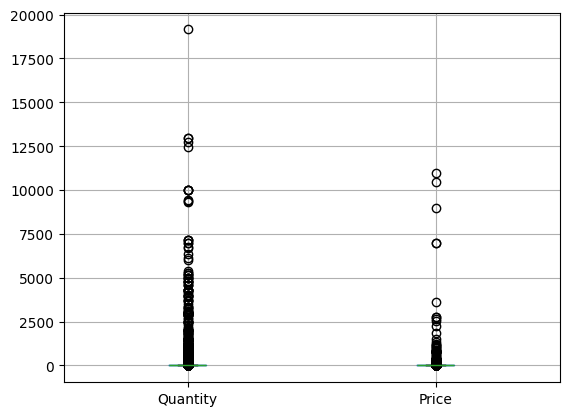

In [17]:
df1[["Quantity", "Price"]].boxplot();

In [18]:
df2[["Quantity", "Price"]].boxplot()

<Axes: >

<a id='rfm'></a>
<h1 style="color:purple" >5. RFM Analysis</h1> 

<h2 style="color:purple" >Recency</h2> 

In [19]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())
print("2010-2011: Min Date", df2["InvoiceDate"].min(), "Max Date", df2["InvoiceDate"].max())

2009-2010: Min Date 2009-12-01 07:45:00 Max Date 2010-12-09 20:01:00
2010-2011: Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


In [21]:
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency2 = (dt.datetime(2011, 12, 9) - df2.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)
recency2["Recency"] = recency2["Recency"].apply(lambda x: x.days)

recency2.head()

,Recency
Customer ID,
12346.00,324
12347.00,1
12348.00,74
12349.00,17
12350.00,309


<h2 style="color:purple" >Frequency</h2> 


In [22]:
freq1 = df1.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq2 = df2.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq2

,Frequency
Customer ID,
12346.00,1
12347.00,7
12348.00,4
12349.00,1
12350.00,1
...,...
18280.00,1
18281.00,1
18282.00,2


<h2 style="color:purple" >Monetary</h2> 


In [23]:
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

monetary1 = df1.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary2 = df2.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

monetary2.head()

,Monetary
Customer ID,
12346.00,77183.60
12347.00,4310.00
12348.00,1797.24
12349.00,1757.55
12350.00,334.40


In [24]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm2 = pd.concat([recency2, freq2, monetary2],  axis=1)

rfm2.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,324,1,77183.60
12347.00,1,7,4310.00
12348.00,74,4,1797.24
12349.00,17,1,1757.55
12350.00,309,1,334.40


<h2 style="color:purple" >Create RFM Score</h2> 

In [25]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm2["RecencyScore"] = pd.qcut(rfm2["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm2["FrequencyScore"]= pd.qcut(rfm2["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm2["MonetaryScore"] = pd.qcut(rfm2['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.00,324,1,77183.60,1,1,5
12347.00,1,7,4310.00,5,5,5
12348.00,74,4,1797.24,2,4,4
12349.00,17,1,1757.55,4,1,4
12350.00,309,1,334.40,1,1,2


In [26]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) + 
                     rfm2['FrequencyScore'].astype(str) + 
                     rfm2['MonetaryScore'].astype(str))

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.00,324,1,77183.60,1,1,5,115
12347.00,1,7,4310.00,5,5,5,555
12348.00,74,4,1797.24,2,4,4,244
12349.00,17,1,1757.55,4,1,4,414
12350.00,309,1,334.40,1,1,2,112


In [27]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00,324,1,77183.60,1,1,5,115,Hibernating
12347.00,1,7,4310.00,5,5,5,555,Champions
12348.00,74,4,1797.24,2,4,4,244,At Risk
12349.00,17,1,1757.55,4,1,4,414,Promising
12350.00,309,1,334.40,1,1,2,112,Hibernating


<h2 style="color:purple" >Summary Statistics</h2> 

In [28]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.85,51.00,343,10.26,1.20,1.00,343,0.40,442.27,317.76,343,417.30
At Risk,149.94,128.00,611,69.98,3.07,3.00,611,1.09,1188.21,760.19,611,1844.17
Can't Loose,121.72,106.50,78,49.72,9.04,7.50,78,5.78,4072.97,2316.49,78,5275.40
Champions,5.12,5.00,663,4.62,12.50,8.00,663,17.19,6852.26,2508.32,663,21556.38
Hibernating,212.31,211.00,1016,89.78,1.13,1.00,1016,0.33,401.98,250.16,1016,775.08
Loyal Customers,34.28,29.00,743,16.06,6.82,5.00,743,4.38,2743.48,1818.71,743,3255.11
Need Attention,51.21,51.00,207,9.84,2.45,2.00,207,0.50,1058.79,730.47,207,1190.26
New Customers,6.58,6.50,50,4.31,1.00,1.00,50,0.00,386.20,258.82,50,493.32
Potential Loyalists,16.77,17.00,516,9.73,2.02,2.00,516,0.70,729.16,523.66,516,837.55


In [29]:
rfmStats2 = rfm2[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats2.columns = rfmStats2.columns.map('_'.join).str.strip('|')
rfmStats2

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.37,51.00,353,10.97,1.16,1.00,353,0.37,472.55,331.95,353,532.93
At Risk,152.04,137.00,594,68.64,2.87,3.00,594,0.94,1079.81,675.16,594,2559.61
Can't Loose,130.05,105.00,64,65.15,8.31,7.00,64,4.14,2791.01,2236.74,64,2074.24
Champions,4.37,3.00,632,3.68,12.34,8.00,632,16.37,6866.78,2613.85,632,20354.66
Hibernating,215.66,217.00,1069,92.04,1.10,1.00,1069,0.30,488.86,293.00,1069,2421.94
Loyal Customers,31.69,28.00,820,15.60,6.44,5.00,820,4.45,2862.89,1737.83,820,6003.49
Need Attention,50.27,50.00,184,11.53,2.32,2.00,184,0.47,894.49,637.77,184,1110.27
New Customers,5.43,6.00,42,3.90,1.00,1.00,42,0.00,388.21,274.50,42,570.78
Potential Loyalists,15.37,16.00,486,9.34,2.01,2.00,486,0.65,1041.34,524.00,486,7640.53


<a id='visualize'></a>
<h1 style="color:purple" >6. Visualize</h1> 

In [37]:

plt.figure(figsize=(25, 8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red", "orange", "blue", "forestgreen", "yellow", "purple", "cornsilk", "royalblue", "pink", "brown"], alpha=.4)
plt.suptitle("Number of Customers \n 2009-2010", fontsize=25)

plt.savefig("treemap_2009_2010.png", bbox_inches='tight')
plt.close()  

In [38]:

plt.figure(figsize=(25, 8))
squarify.plot(sizes=rfmStats2.Recency_count, label=rfmStats2.index, 
              color=["red", "orange", "blue", "forestgreen", "yellow", "purple", "cornsilk", "royalblue", "pink", "brown"], alpha=.4)
plt.suptitle("Number of Customers \n 2010-2011", fontsize=25)

plt.savefig("treemap_2010_2011.png", bbox_inches='tight')
plt.close()  